In [42]:
### Load keypoints detection model
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

weights = KeypointRCNN_ResNet50_FPN_Weights.COCO_V1
model =  keypointrcnn_resnet50_fpn(weights=weights)
transforms = weights.transforms()

model.eval().to("cpu")

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [43]:
### Import Videos
import av
from torchvision.io import read_video
import os

video_path = os.path.join("Nov24", "walking.mp4")
video, audio, meta = read_video(video_path, pts_unit="sec", output_format="TCHW")
frame_count = len(video)
fps = meta['video_fps']

print(frame_count, fps)

162 29.88291588955274


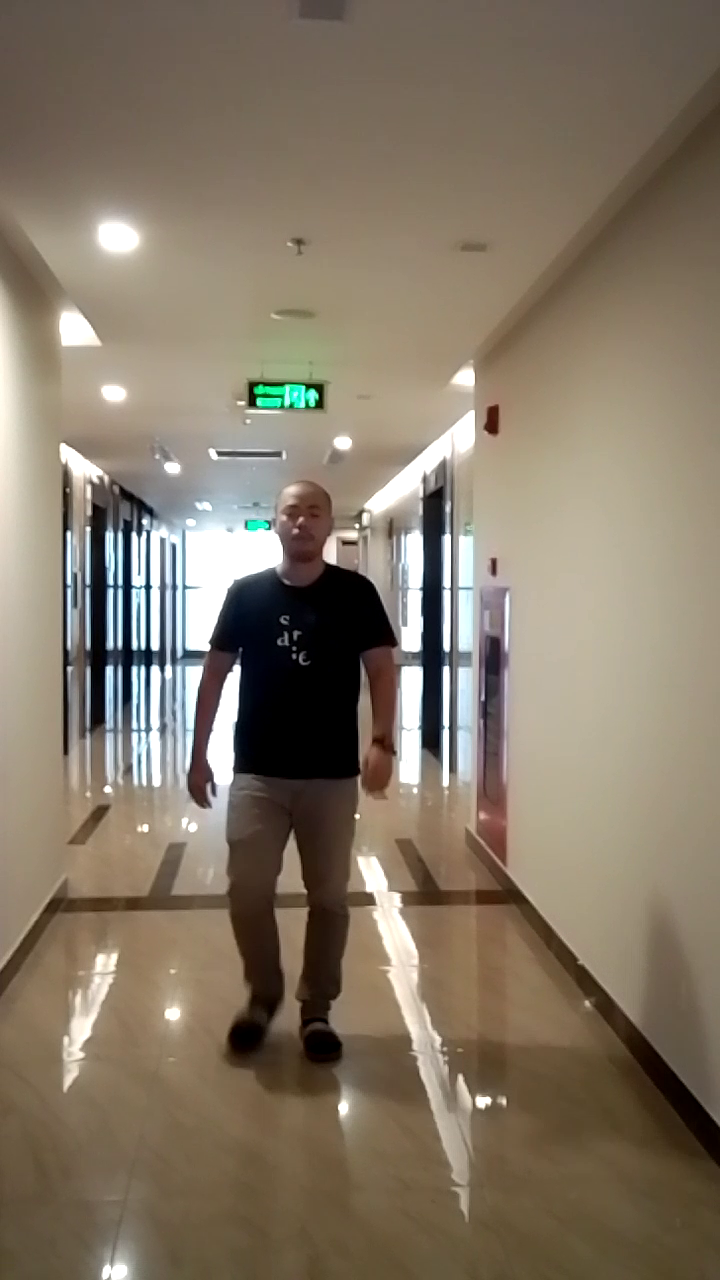

In [44]:
### Display one frame from the video
from torchvision.transforms.functional import to_pil_image

image = to_pil_image(video[129])
image = image.rotate(90, expand=True)
image

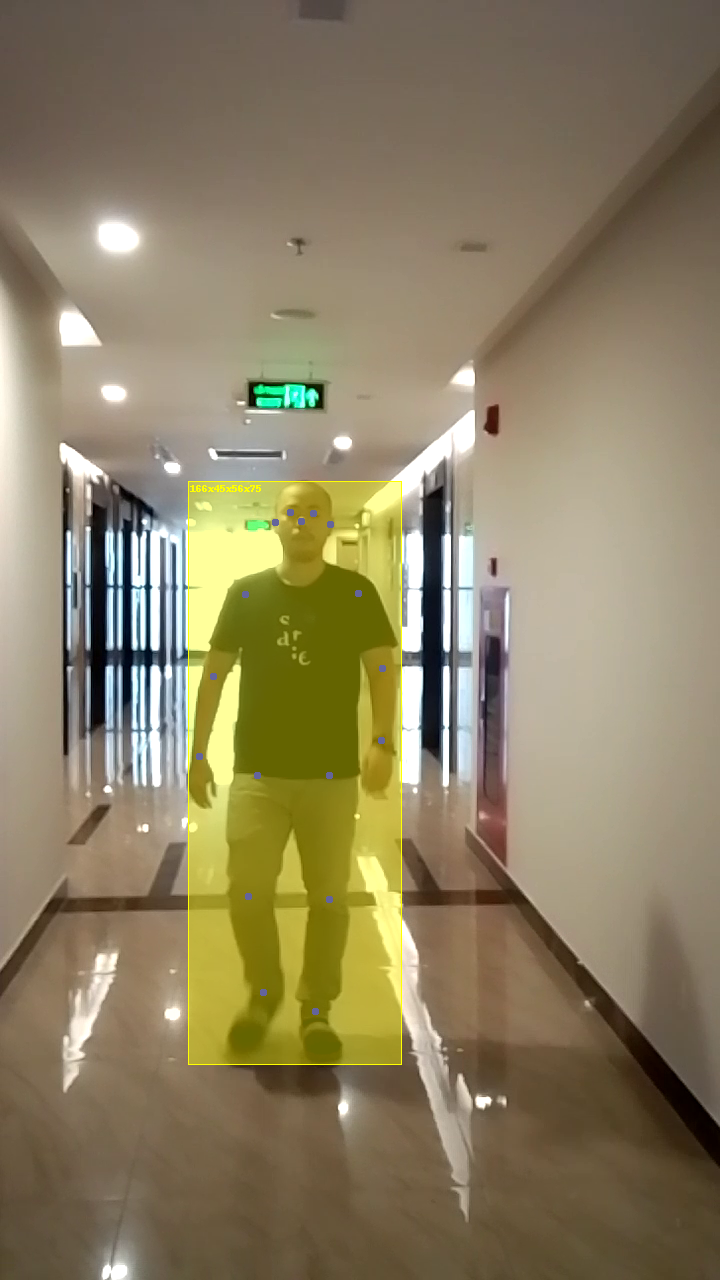

In [48]:
### Frame Keypoints Prediction and Visualization
import torch
from torchvision.utils import draw_keypoints, draw_bounding_boxes
from torchvision.transforms.functional import pil_to_tensor

def detect(frame):
    ### Make Predictions on Frame
    body_matrix = transforms(frame)
    predictions = model([body_matrix.to("cpu")])

    ### Extract Boxes, Scores and Keypoints from frame
    boxes = predictions[0]['boxes']
    keypoints = predictions[0]['keypoints']
    scores = predictions[0]['scores']

    ### Filter for the main Bounding Box and Keypoints
    top = torch.max(scores)
    idx = torch.where(scores==top)
    
    bx = torch.unsqueeze(boxes[idx][0], dim=0)
    kp = torch.unsqueeze(keypoints[idx][0], dim=0)

    ### Draw Keypoints and Bounding Boxes
    tensor_image = pil_to_tensor(frame)
    keypoints_image = draw_keypoints(tensor_image, kp, colors="blue", radius=3)
    final_image = draw_bounding_boxes(keypoints_image, bx, labels=['166x45x56x75'], colors="yellow", fill=True)
    
    return to_pil_image(final_image)


detected = detect(image)
detected